<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Что такое счастье?

Дата сет из открытых источников об уровне счастья в разных странах.

https://www.kaggle.com/datasets/unsdsn/world-happiness/data

#Задание

* Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

* Дополнительная часть (необязательная)

построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix.

In [ ]:
# импорт библиотек

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

In [ ]:
param = r'/content/drive/My Drive/Нетология/PY_Статистика/дз/ДЗ_2/'

file = '2019.csv'

df_joy= pd.read_csv(f'{param}{file}', sep = ',', index_col='Overall rank')

df_joy.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df_joy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 156
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.0+ KB


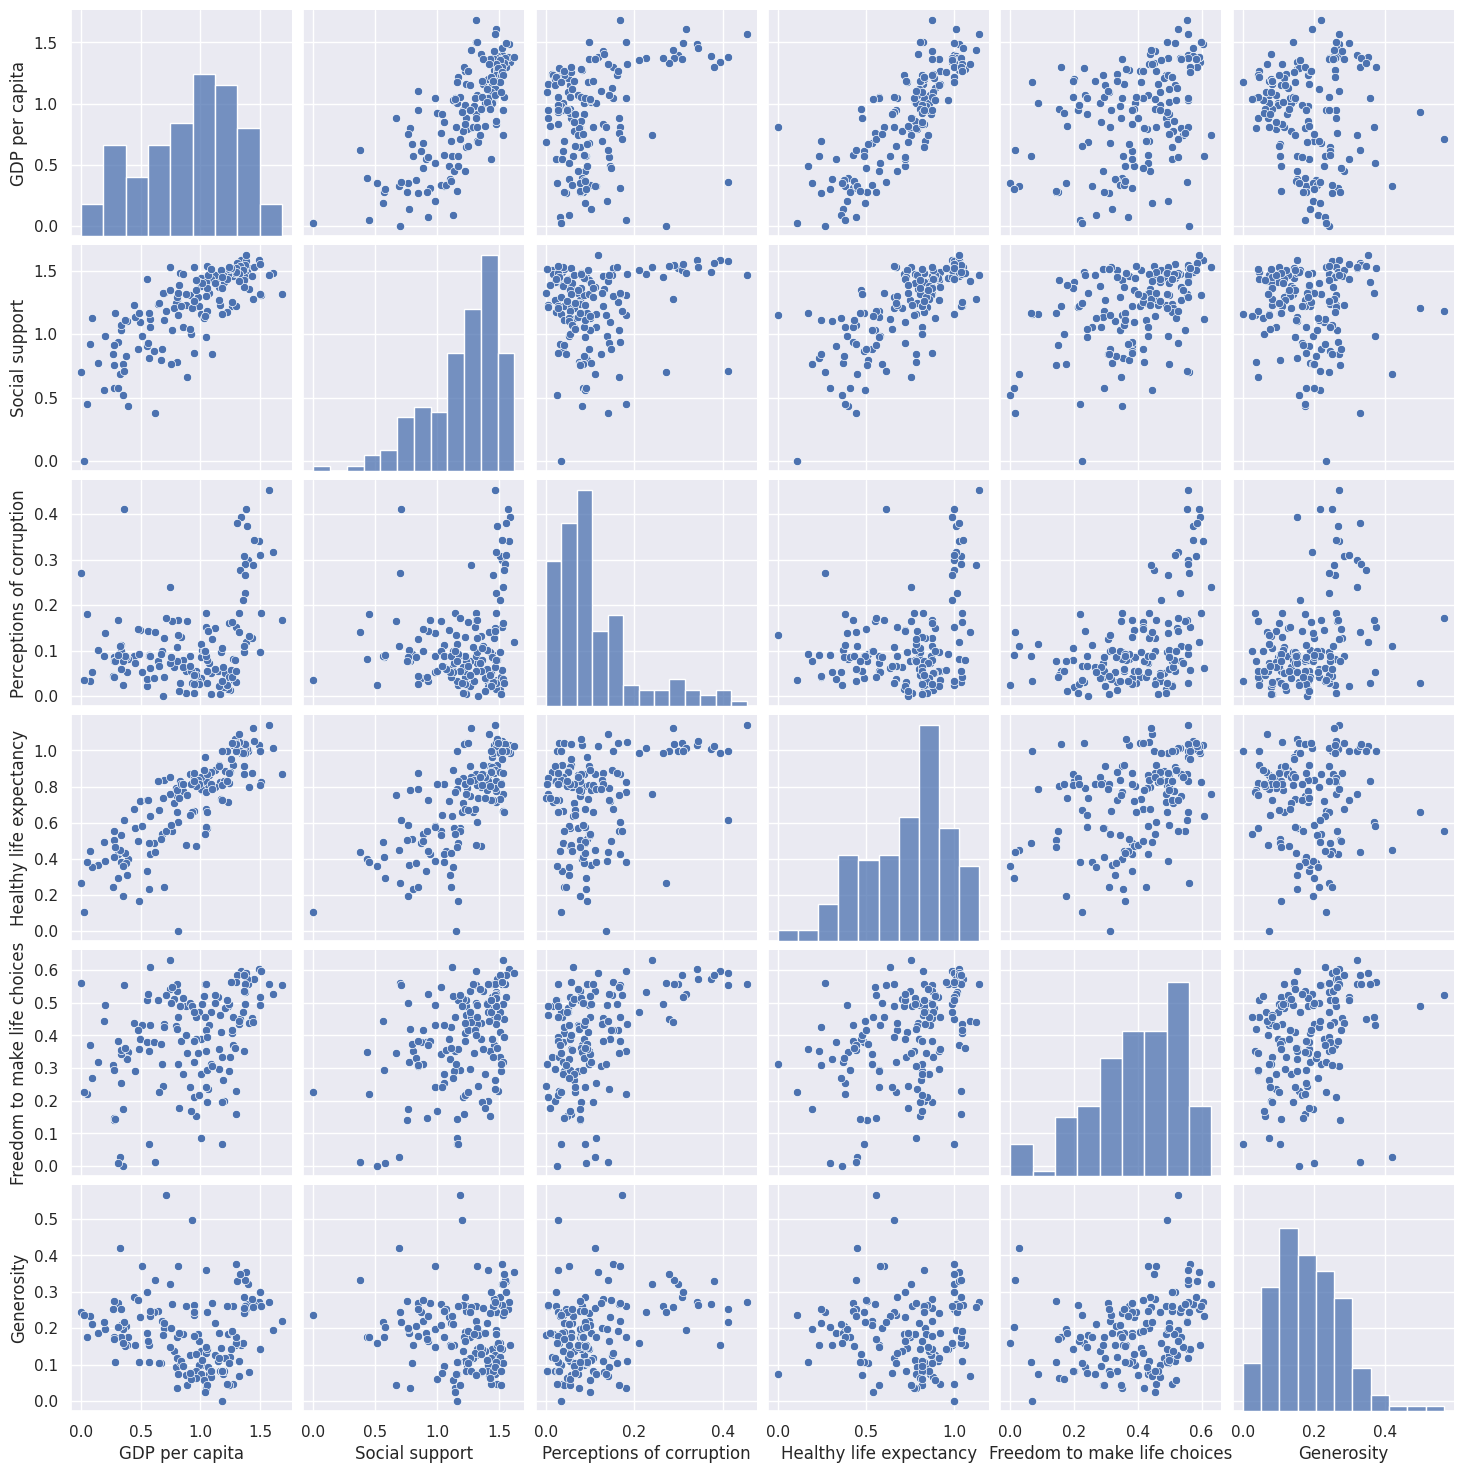

In [ ]:
# Определим как связаны между собой различные социальные признаки
sns.pairplot(df_joy[['GDP per capita', 'Social support', 'Perceptions of corruption', 'Healthy life expectancy','Freedom to make life choices', 'Generosity']])


1. Рассматриваемые признаки имеют около нормальное распределение:
 экономика/ВВП на душу населения 'GDP per capita', уровень жизни/здоровья 'Healthy life expectancy', свобода выбора 'Freedom to make life choices';
 экспотенциальное - Соц. поддержка 'Social support' и логарифмическое - восприятие корупции 'Perceptions of corruption', уровент щедрости 'Generosity'.
2. Сформулируем несколько гипотез:
 - в развитых странах, с высоким уровнем ВВП/ экономикой 'GDP per capita' - уровень соц. поддрежки 'Social support' выше;
 - в странах, с высоким уровенм соц. поддрежки 'Social support' - уровень жизни/здоровья 'Healthy life expectancy' выше;
 - в развитых странах, с высоким уровнем экономики / ВВП 'GDP per capita' - уровень жизни/здоровья 'Healthy life expectancy' выше.

по графикам прослеживается прямая зависимость первого признака от второго.

Text(0.5, 1.0, 'Распределение показателей соц. признаков')

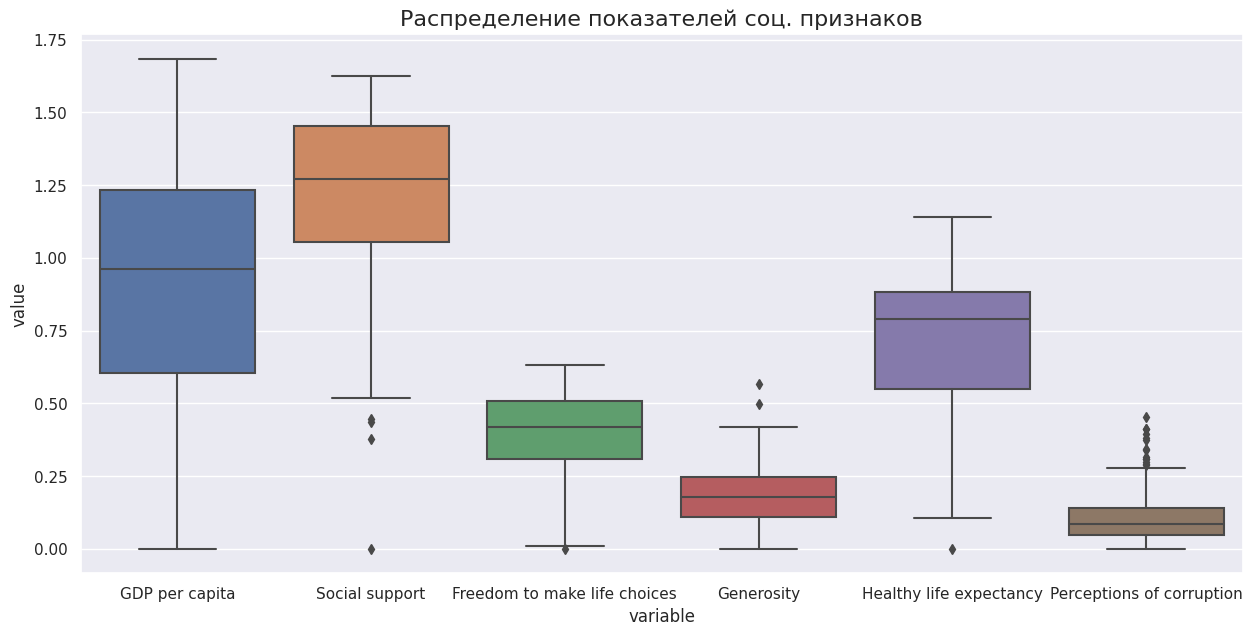

In [ ]:
# Статистически показатели по различным социальные признакам, на основе диаграммы Boxplot

sns.boxplot( x="variable", y="value", data=pd.melt(df_joy[['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity','Healthy life expectancy', 'Perceptions of corruption']]) )
plt.title("Распределение показателей соц. признаков", fontsize=16)

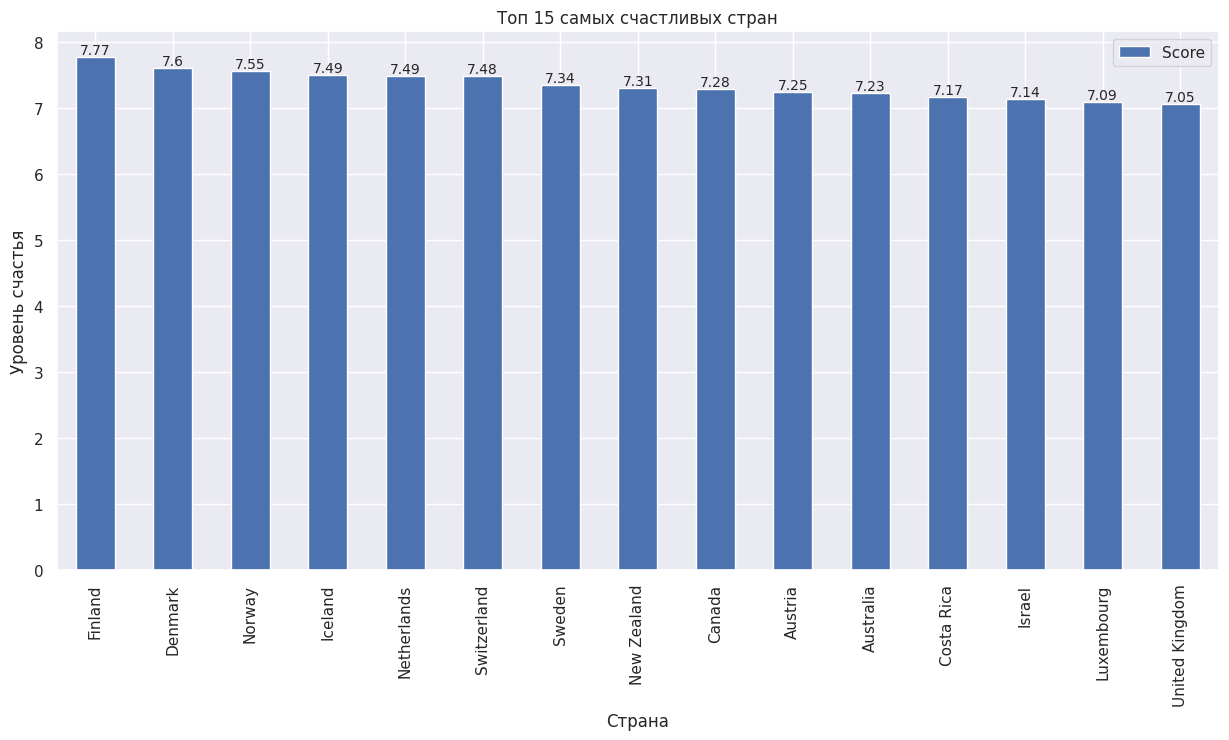

In [ ]:
# топ-15 самых счастливых стран

top_country = df_joy[['Country or region', 'Score']].sort_values('Score', ascending=False).set_index('Country or region').head(15)
top_country.plot(kind='bar', title='Топ 15 самых счастливых стран',
                             xlabel='Страна',
                             ylabel='Уровень счастья')
for i, val in enumerate(top_country.values):
  plt.text(i, val, round(float(val),2), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

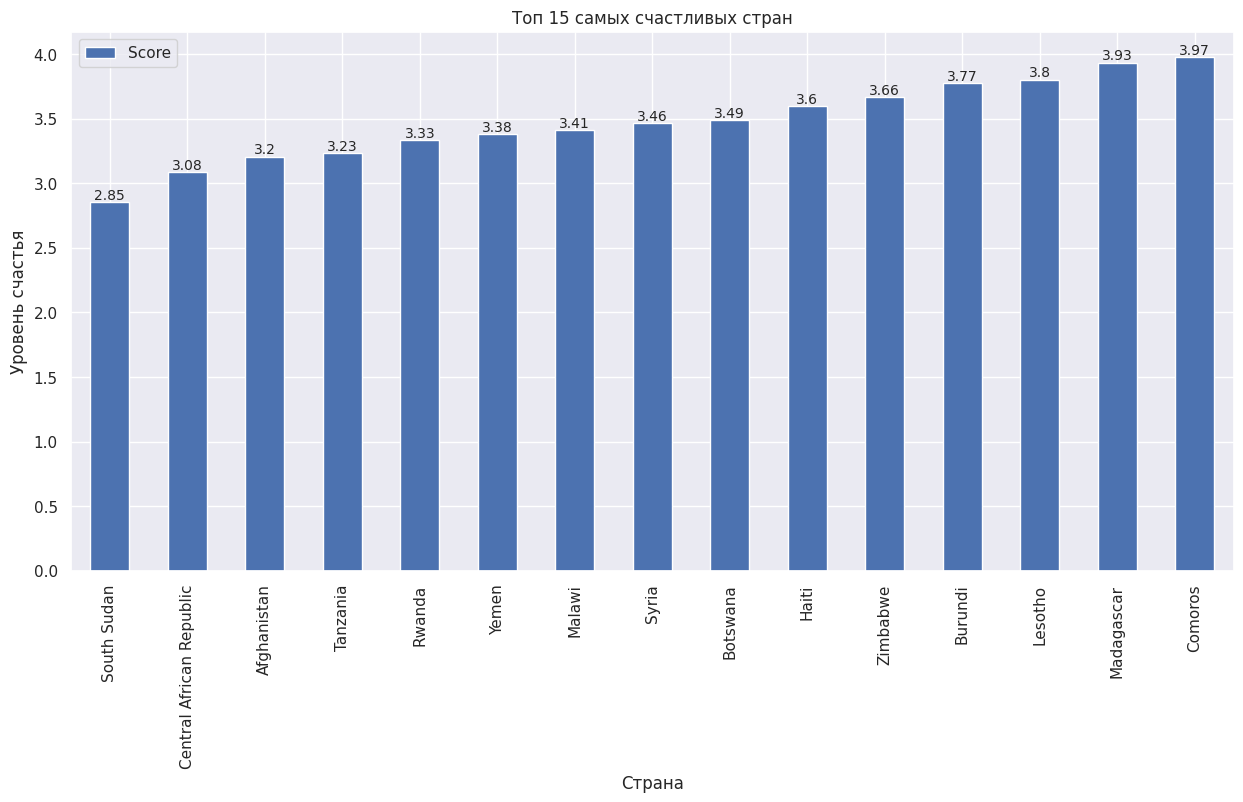

In [ ]:
# топ-15 самых грустных стран

top_country = df_joy[['Country or region', 'Score']].sort_values('Score', ascending=True).set_index('Country or region').head(15)

top_country.plot(kind='bar', title='Топ 15 самых счастливых стран',
                             xlabel='Страна',
                             ylabel='Уровень счастья')
for i, val in enumerate(top_country.values):
  plt.text(i, val, round(float(val),2), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

In [ ]:
# Определим зависимости счастья от некоторых социальных признаков:
#  щедрости - 'Generosity', уровень здоровья/жизни - 'Healthy life expectancy', свободы выбора - 'Freedom to make life choices' , уровнь корупции -'Perceptions of corruption'
df_happy = df_joy[[ 'Score','Generosity', 'Healthy life expectancy', 'Freedom to make life choices',  'Perceptions of corruption']].set_index('Score')
df_happy.head(7)

,Generosity,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Score,,,,
7.769,0.153,0.986,0.596,0.393
7.600,0.252,0.996,0.592,0.410
7.554,0.271,1.028,0.603,0.341
7.494,0.354,1.026,0.591,0.118
7.488,0.322,0.999,0.557,0.298
7.480,0.263,1.052,0.572,0.343
7.343,0.267,1.009,0.574,0.373


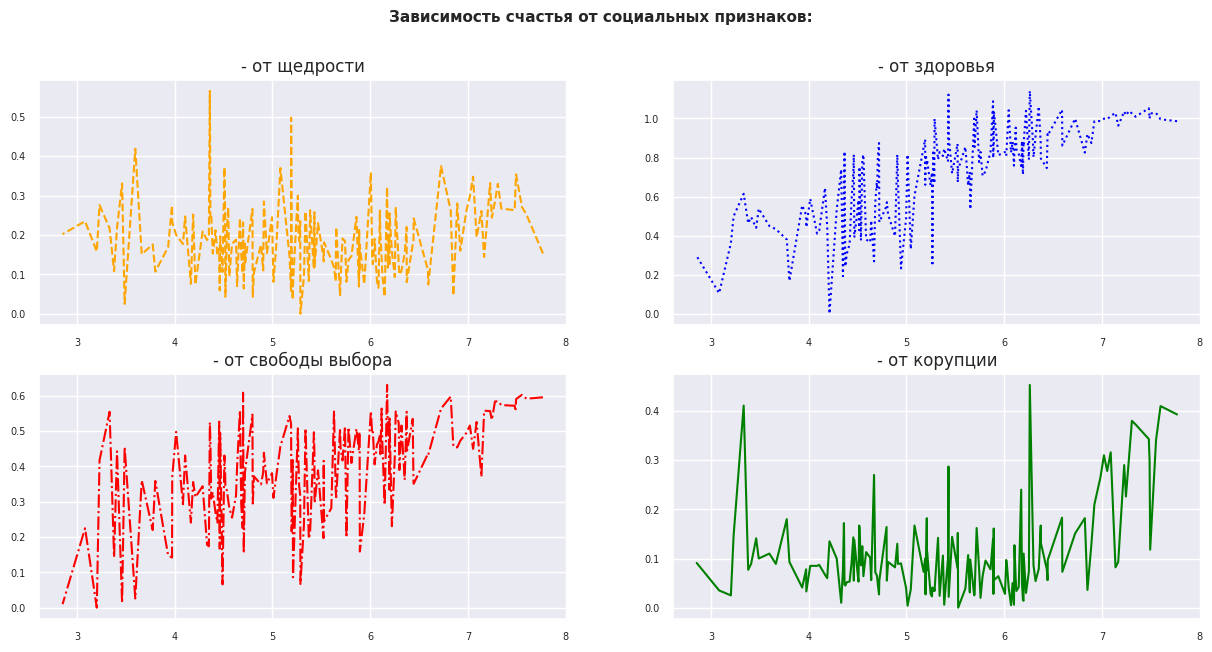

In [ ]:
plt.suptitle('Зависимость счастья от социальных признаков:', fontsize=11, fontweight='bold')

plt.subplot(2, 2, 1)
df_happy['Generosity'].plot( xlabel='',
                           ylabel='',
                           color='orange',
                           linestyle='--',
                           title='- от щедрости',fontsize=7)

plt.subplot(2,2,2)
df_happy['Healthy life expectancy'].plot(xlabel='',
                                    ylabel='',
                                    color='blue',
                                    linestyle=':',
                                    title='- от здоровья', fontsize=7)

plt.subplot(2,2,3)
df_happy['Freedom to make life choices'].plot(xlabel='',
                                        ylabel='',
                                        color='red',
                                        linestyle='-.',
                                        title='- от свободы выбора',fontsize=7)

plt.subplot(2,2,4)
df_happy['Perceptions of corruption'].plot(xlabel='',
                                          ylabel='',
                                          color='green',
                                          linestyle='-',
                                          title='- от корупции',fontsize=7)

plt.show()

<Axes: title={'center': 'Уровень счастья от социальных признаков'}, xlabel='Score'>

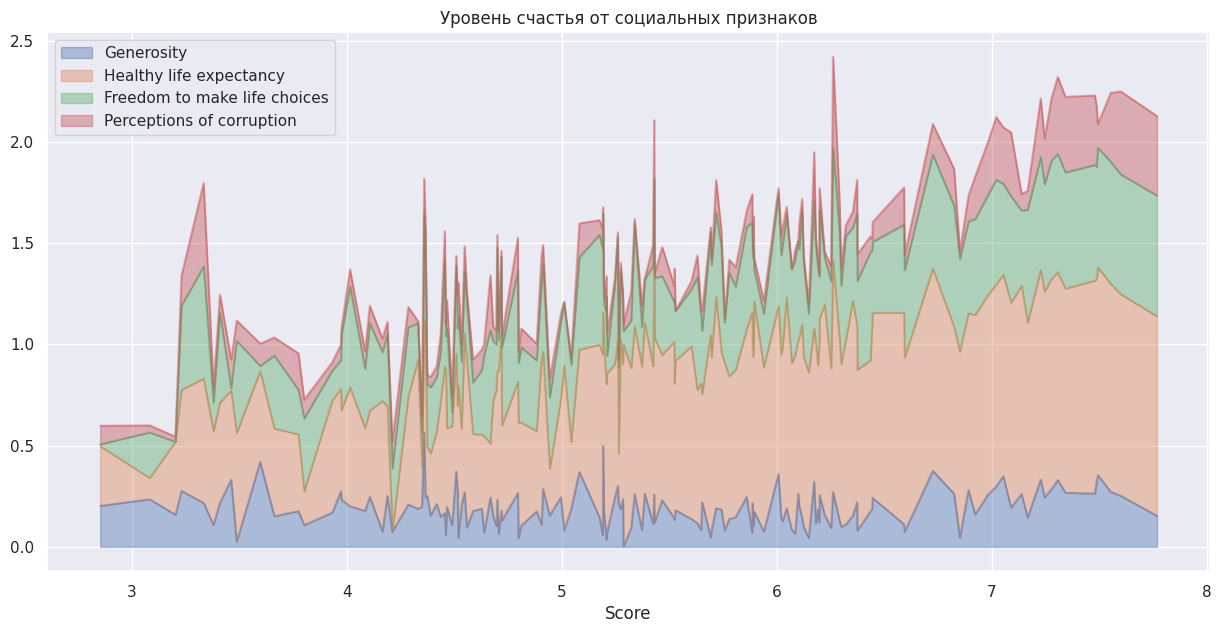

In [ ]:
# тоже самое, только в Area chart - красиво, но не информативно
df_happy.plot(kind='area', title='Уровень счастья от социальных признаков',
                            alpha=0.4)

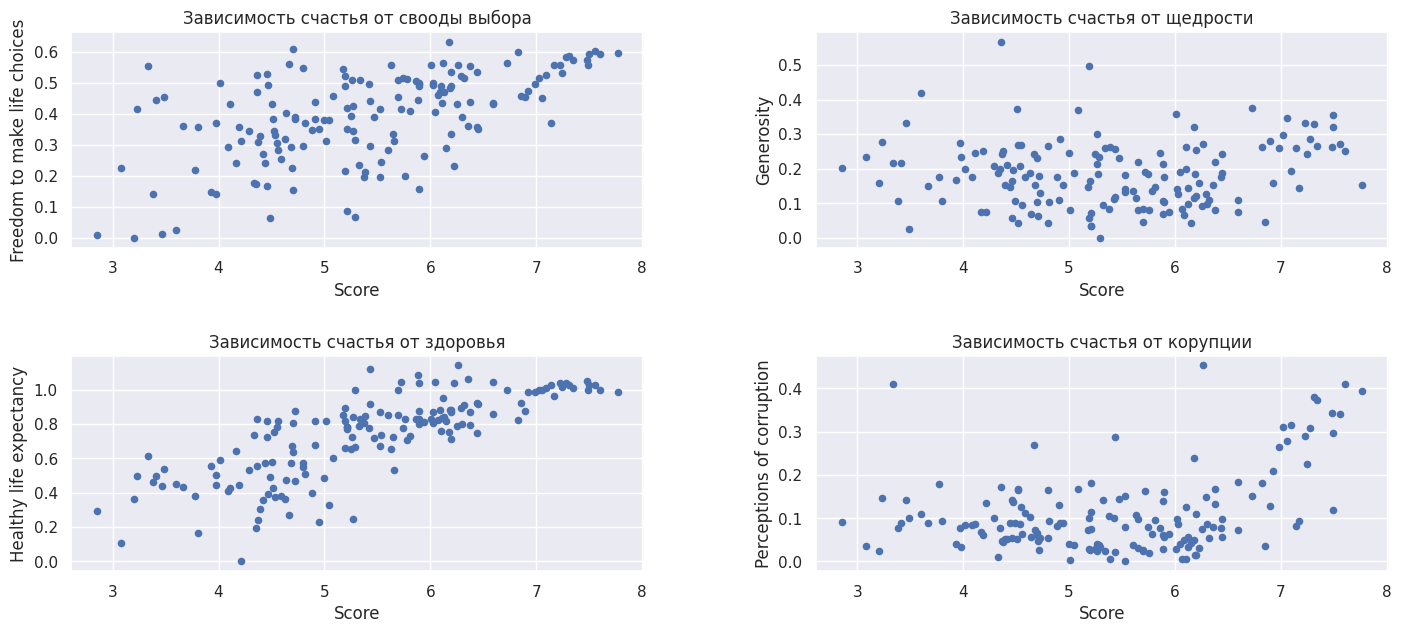

In [ ]:
# посмотрим на взаимосвязь оценок и продаж

fig, axs = plt.subplots(2, 2,figsize=(17, 7))
plt.subplots_adjust(wspace= 0.3,
                    hspace=0.5)

df_joy.plot(kind='scatter',
        x = 'Score',
        y = 'Freedom to make life choices',
        title='Зависимость счастья от свооды выбора',
        ax=axs[0,0])

df_joy.plot(kind='scatter',
        x='Score',
        y='Generosity',
        title='Зависимость счастья от щедрости',
        ax=axs[0,1])

df_joy.plot(kind='scatter',
        x='Score',
        y='Healthy life expectancy',
        title='Зависимость счастья от здоровья',
        ax=axs[1,0])

df_joy.plot(kind='scatter',
        x='Score',
        y='Perceptions of corruption',
        title='Зависимость счастья от корупции',
         ax=axs[1,1])

plt.show()

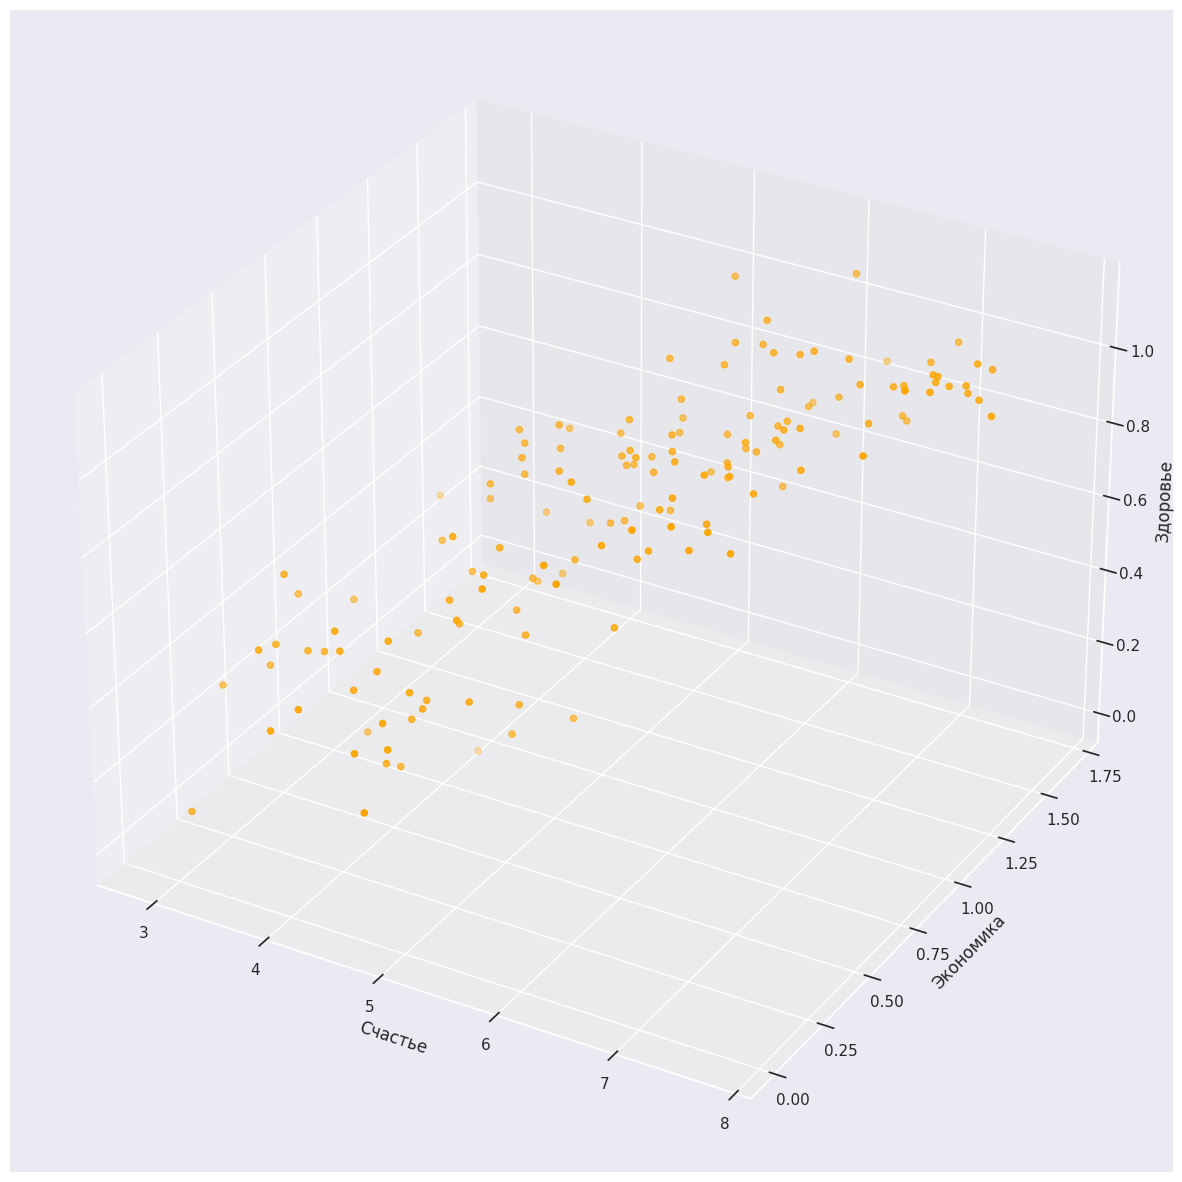

In [ ]:
# объемное счастье  - визуализация в 3D от параметров: уровень счастья, уровень жизни/здоровья, уровень ВВП/экономика )

sns.set(style = "darkgrid")
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(111, projection = '3d')

x = df_joy['Score']
y = df_joy['GDP per capita']
z =  df_joy['Healthy life expectancy']

ax.set_xlabel("Счастье")
ax.set_ylabel("Экономика")
ax.set_zlabel("Здоровье")

ax.scatter(x, y, z, color="orange")

plt.show()

In [ ]:
# добавим информацию о регионах к нашему исходному датасету и определим уровень счастья в разрезе регионов
file2 = 'Country and region.csv'

df_region= pd.read_csv(f'{param}{file2}', sep = ';')

df_region.head()

,Country,Region
0,Trinidad & Tobago,Trinidad and Tobago
1,Northern Cyprus,Western Europe
2,North Macedonia,Central and Eastern Europe
3,Gambia,Sub-Saharan Africa
4,Finland,Western Europe


In [ ]:
df_joy= df_joy.merge(df_region, left_on = 'Country or region', right_on='Country', how='inner')
df_joy.head(7)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country,Region
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Finland,Western Europe
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,Western Europe
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Norway,Western Europe
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,Western Europe
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Western Europe
5,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Switzerland,Western Europe
6,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Sweden,Western Europe


In [ ]:
# проверим кол-во строк в новом датафрейме
#  объединение прошло без дубликатов, и пропусков
df_joy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
 8   Country                       156 non-null    object 
 9   Region                        156 non-null    object 
dtypes: float64(7), object(3)
memory usage: 13.4+ KB


In [ ]:
df_joy_region = df_joy.groupby('Region')[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption' ]].sum()\
  .sort_values('Score', ascending=False)

df_joy_region.head(7)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Region,,,,,,,
Sub-Saharan Africa,172.002,17.750,36.667,16.302,13.494,7.509,3.780
Central and Eastern Europe,161.284,29.611,38.825,23.476,10.368,4.139,1.791
Western Europe,143.686,28.504,30.930,21.319,10.068,4.612,4.586
Latin America and Caribbean,118.851,18.179,26.657,16.336,8.770,2.852,1.497
Middle East and Northern Africa,99.503,20.122,21.825,14.270,6.041,2.916,1.995
Southeastern Asia,47.463,8.370,11.218,6.708,4.894,2.716,1.111
Eastern Asia,34.133,7.411,8.001,5.720,2.233,1.037,0.718


Text(0.5, 1.0, 'Распределение счастья по регионам')

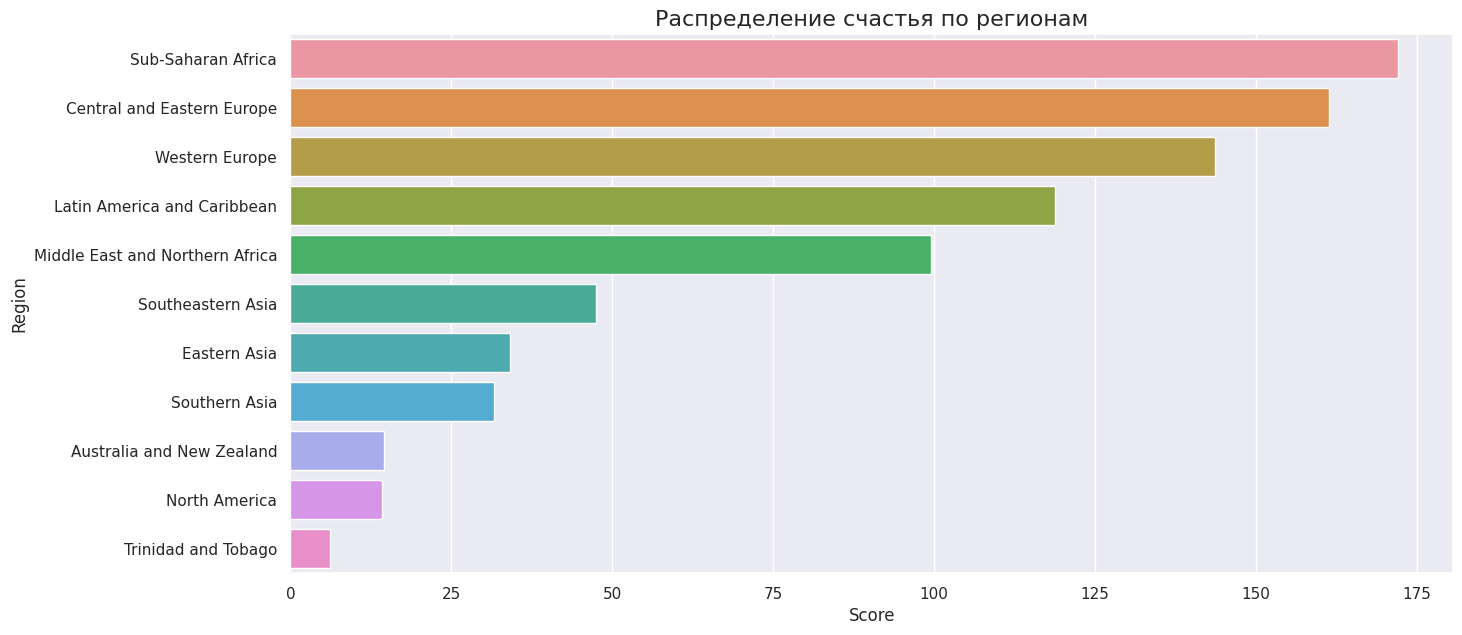

In [ ]:
x=df_joy_region.reset_index()['Score']
y=df_joy_region.reset_index()['Region']
sns.barplot( x=x, y=y)
plt.title("Распределение счастья по регионам", fontsize=16)

<Axes: ylabel='Region'>

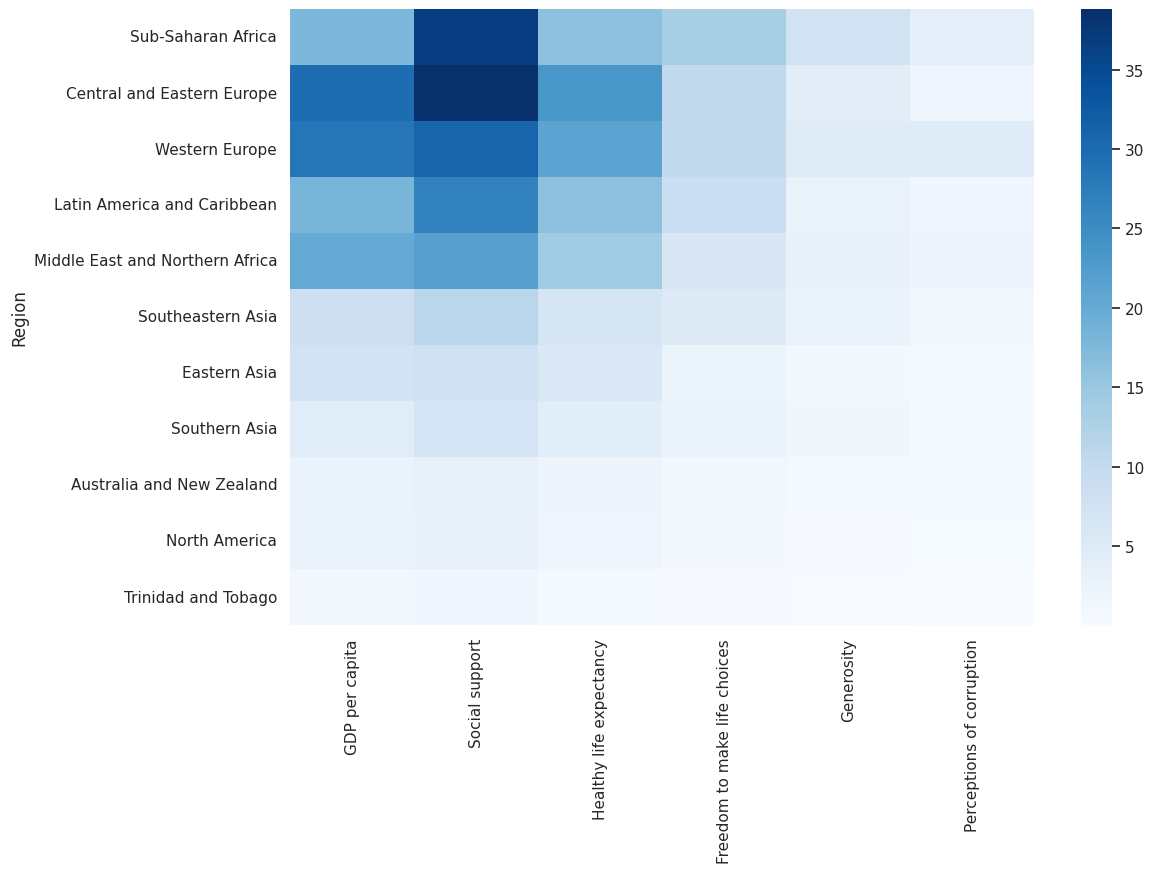

In [ ]:
#  Визуализируем социальные показатели по регионам
plt.figure(figsize = (12,8))
sns.heatmap(df_joy_region[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption' ]], cmap="Blues")